<a href="https://colab.research.google.com/github/dutta-arka/Transit-Detect/blob/main/Vetting/TIC_32001057_Vetting_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install triceratops

In [ ]:
!pip install lightkurve

In [3]:
import numpy as np
import pandas as pd
import time
import lightkurve as lk
from lightkurve import TessLightCurve
import matplotlib.pyplot as plt
%matplotlib inline

import triceratops.triceratops as tr

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
# .csv file is directly from SHERLOCKPIPE out product
data = pd.read_csv("lc_0.csv")

# Extract the values from each column
x = data.iloc[:, 0]
y = data.iloc[:, 1]
error = data.iloc[:, 2]

# LightCurve object
lc = lk.LightCurve(time=x, flux=y, flux_err=error)#.bin(time_bin_size=0.007)
lc = lc.remove_nans()

# Perform phase folding around the given epoch
tic_id = 32001057
period = 26.1241221029427  # Orbital period in days
epoch = 1325.82502749371
folded_lc = lc.fold(period=period, epoch_time=epoch)
folded_lc = folded_lc[folded_lc.time < 1.5]
folded_lc = folded_lc[folded_lc.time > -1.5]

# Plot the data with error bars
# plt.errorbar(x, y, fmt='o', markersize=3, capsize=2)

# # Plot a dotted line connecting the y-values
# plt.plot(x, y, linestyle=':', color='black')

# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Folded light curve')
# plt.gcf().set_size_inches(15, 8)
# plt.grid(True)
# plt.show()

# Create a DataFrame with the required columns
folded_data = pd.DataFrame({
    'Time': folded_lc.time.value,  # Convert time to array
    'Flux': folded_lc.flux.value,  # Convert flux to array
    'Flux Error': folded_lc.flux_err.value  # Convert flux error to array
})

# Save the phase-folded light curve to a CSV file without column headers
output_filename = f"TIC_{tic_id}_all_sector_lightcurve.csv"
folded_data.to_csv(output_filename, index=False, header=False)

print(f"Phase-folded light curve saved to: {output_filename}")

Phase-folded light curve saved to: TIC_32001057_all_sector_lightcurve.csv


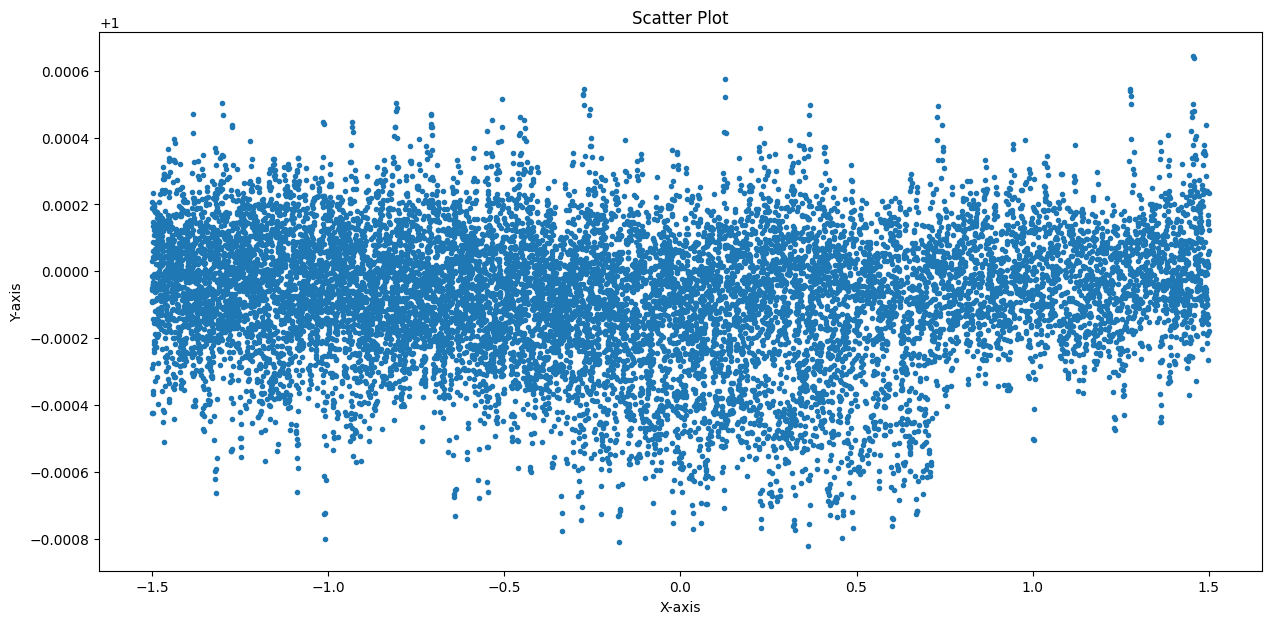

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(f'TIC_{tic_id}_all_sector_lightcurve.csv')

# Extract the x and y values from the dataset
x = data.iloc[:, 0]  # Assuming the first column is the x-axis
y = data.iloc[:, 1]  # Assuming the second column is the y-axis

# Set the figure size
plt.figure(figsize=(15, 7))

# Create a scatter plot
plt.scatter(x, y, marker='.')

# Add labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot')

# Show the plot
plt.show()

In [6]:
ID = tic_id
sectors = np.array([27, 28, 29, 30, 33, 34, 36, 37]) # <1, 2, 3, 4, 6, 7, 9, 10, 13, , 39, 61, 62, 63, 64>
target = tr.target(ID=ID, sectors=sectors, search_radius=6) # target radius shorted

<ipython-input-7-85a2a9877809>:119: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  apertures = np.array([ap_27, ap_28, ap_29, ap_30, ap_33, ap_34, ap_36, ap_37]) #<ap_1, ap_2, ap_3, ap_4, ap_6, ap_7, ap_9, ap_10, ap_13, , ap_39, ap_61, ap_62, ap_63, ap_64>


Sector 27


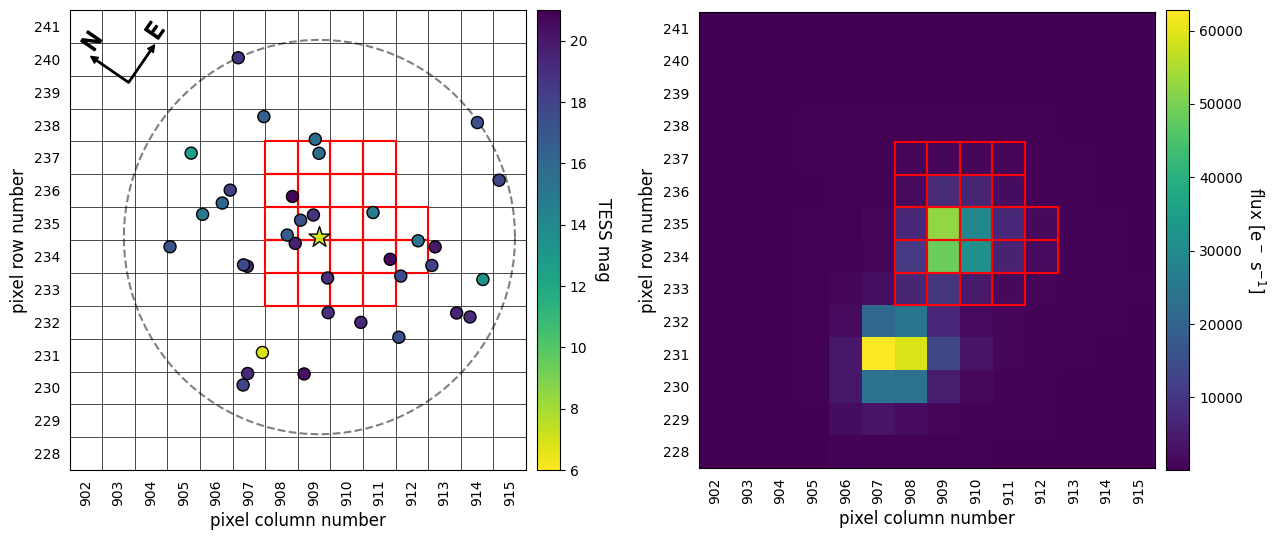

Sector 28


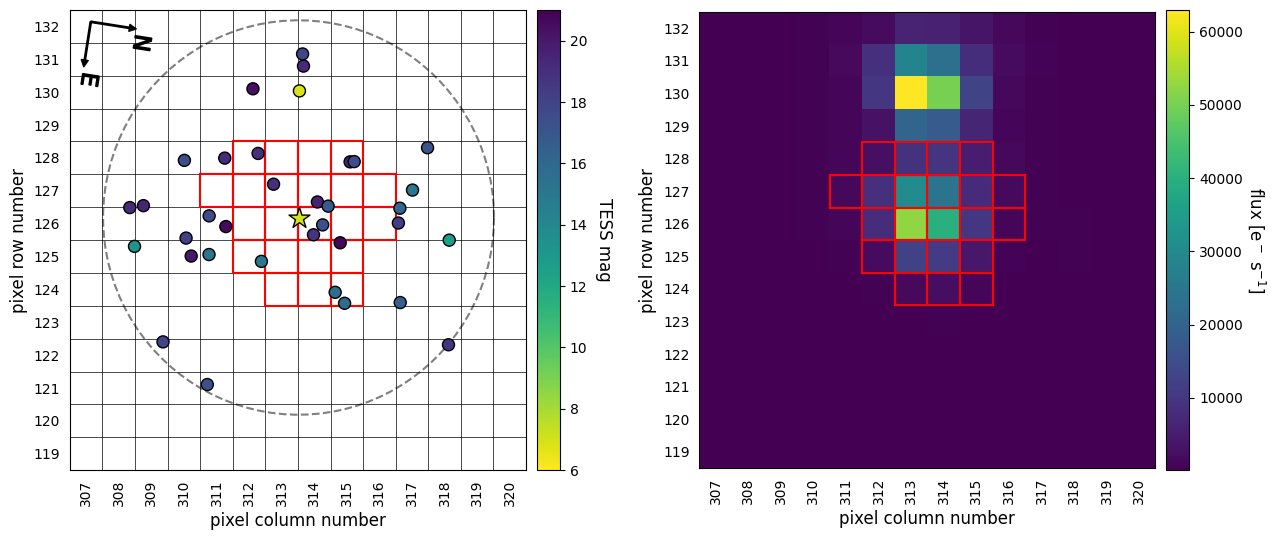

Sector 29


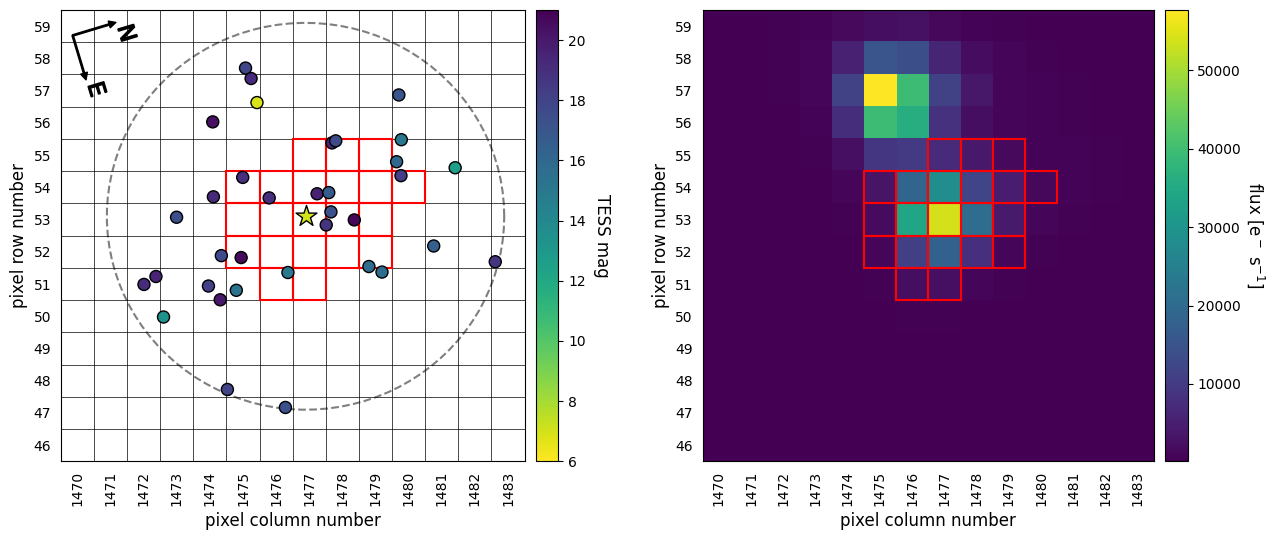

Sector 30


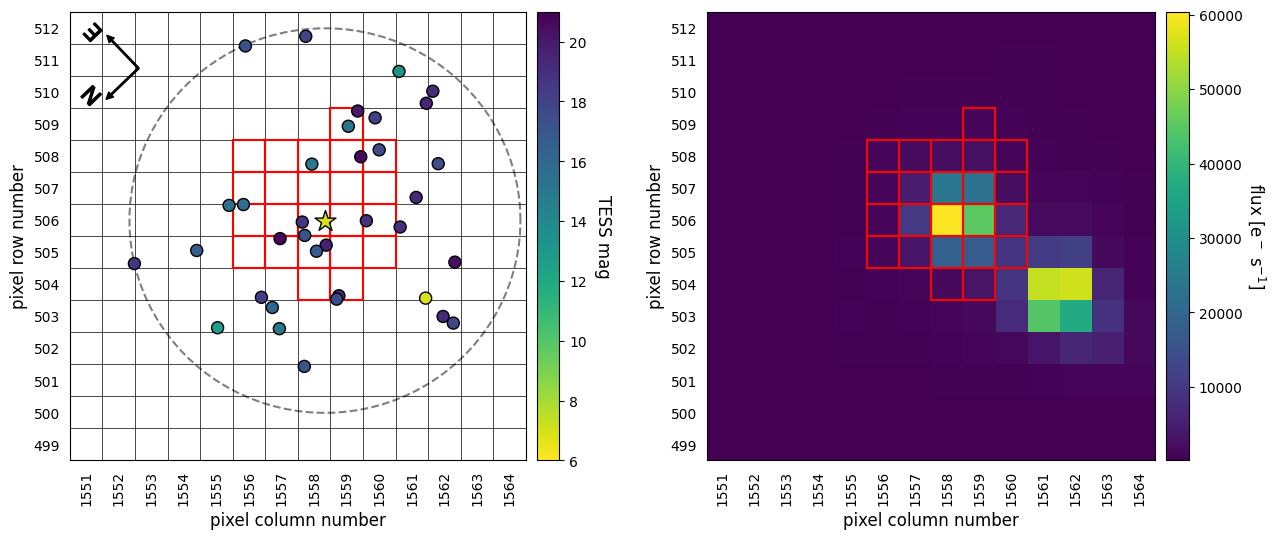

Sector 33


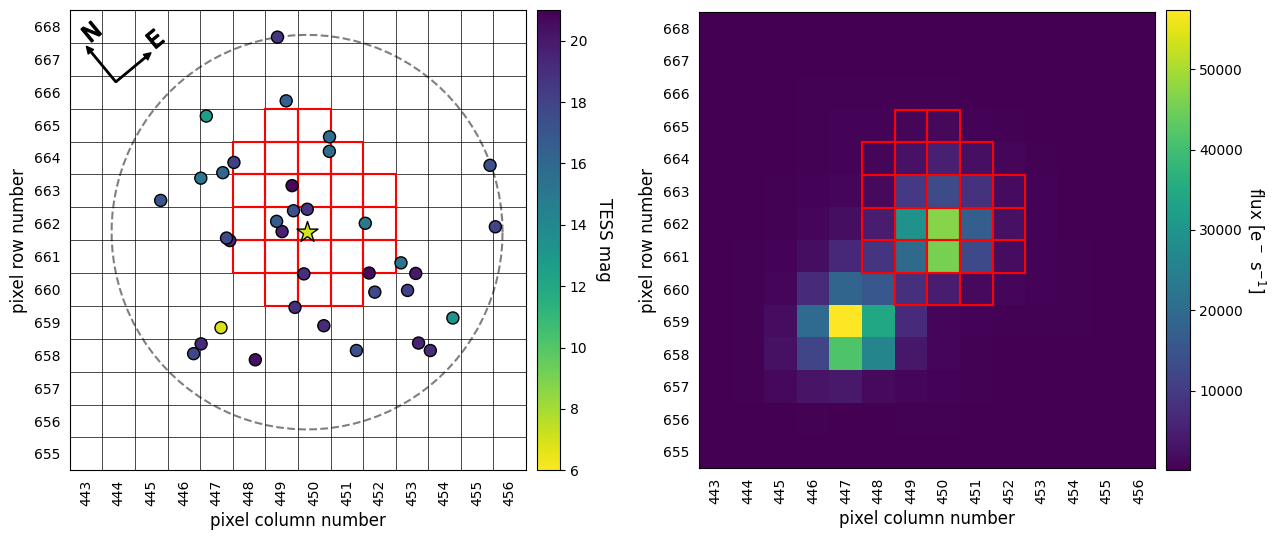

Sector 34


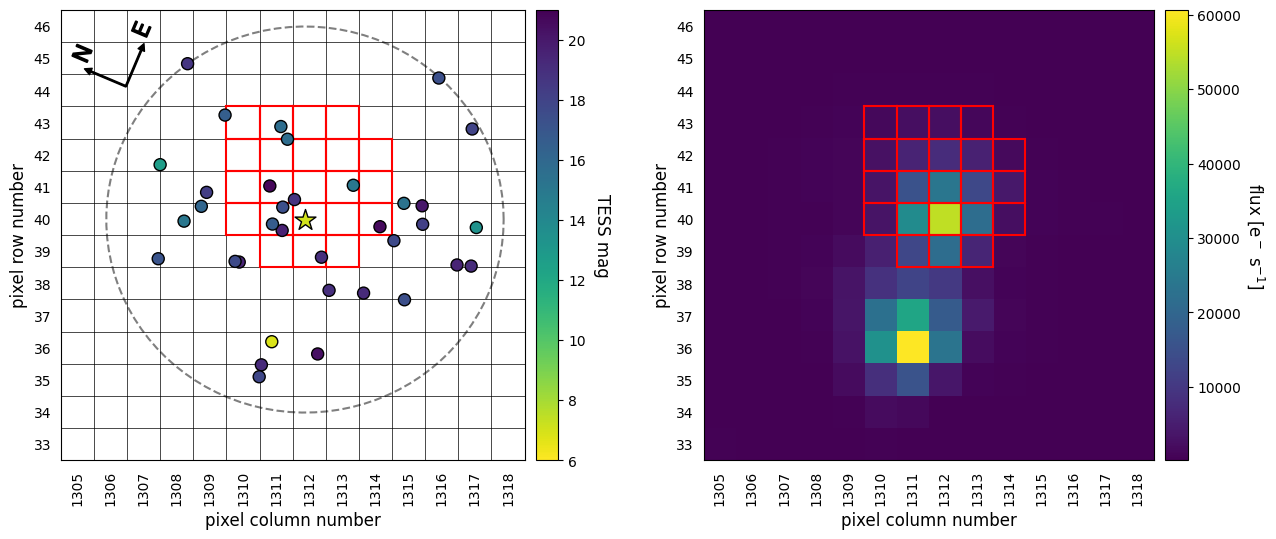

Sector 36


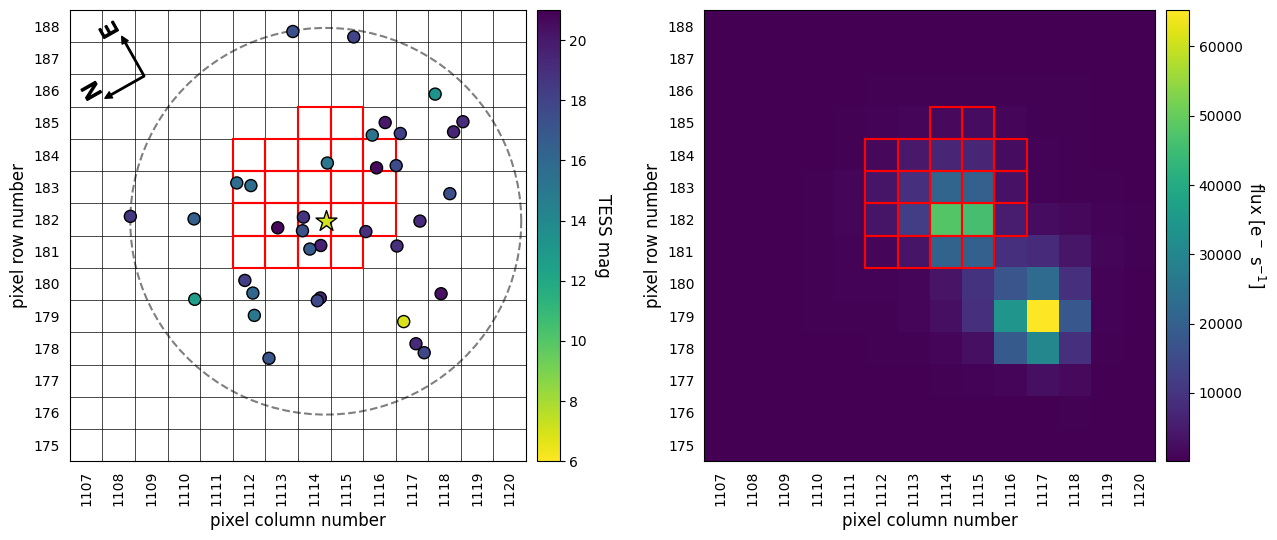

Sector 37


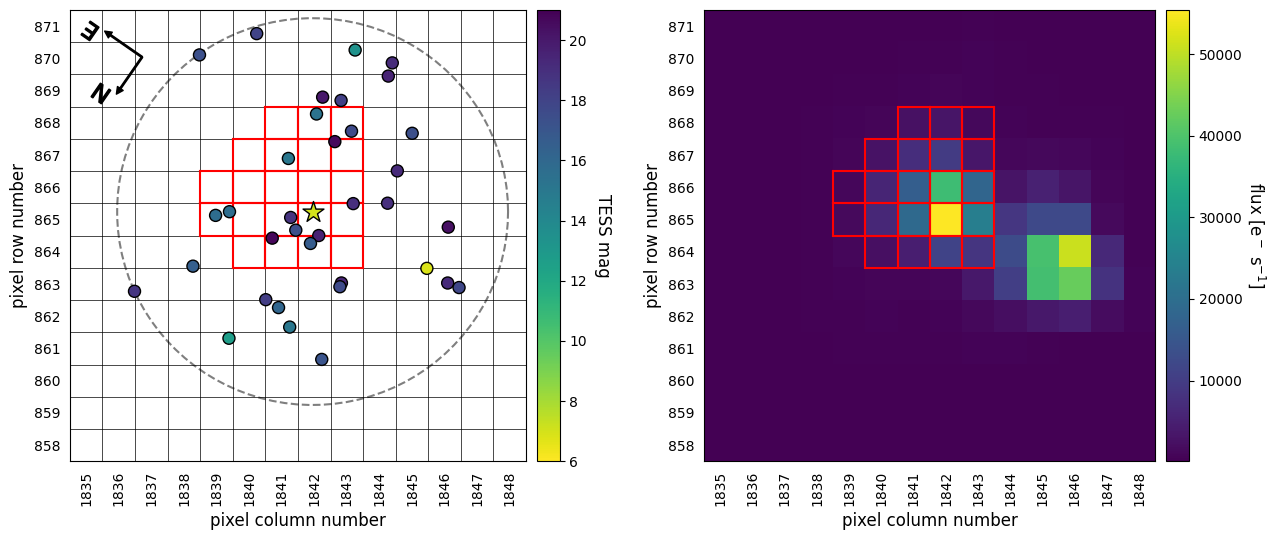

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N)
0,32001057,7.0252,6.483,6.222,6.172,56.256461,-70.024100,1.130000,1.403530,6047.93,18.185900,0.000,0.000
1,650343527,18.7387,NaN,NaN,NaN,56.263725,-70.021145,NaN,NaN,NaN,-0.267414,13.893,40.022
2,650341520,19.6442,NaN,NaN,NaN,56.247576,-70.021168,NaN,NaN,NaN,0.141743,15.194,314.001
3,650341519,17.3345,NaN,NaN,NaN,56.258274,-70.019770,NaN,NaN,NaN,0.457245,15.747,8.143
4,32001059,16.6720,16.172,14.939,15.191,56.248805,-70.019218,NaN,NaN,NaN,NaN,19.940,331.814
5,650341521,19.0012,NaN,NaN,NaN,56.242186,-70.029144,NaN,NaN,NaN,0.938782,25.256,224.025
6,650343528,20.7359,NaN,NaN,NaN,56.265647,-70.016350,NaN,NaN,NaN,NaN,30.100,22.052
7,32001052,15.0345,13.999,13.447,13.277,56.280382,-70.029594,0.700000,0.709708,4473.00,1.678640,35.447,123.928
8,650341518,18.9504,NaN,NaN,NaN,56.228423,-70.032481,NaN,NaN,NaN,0.324423,45.813,228.798
9,650341500,20.5999,NaN,NaN,NaN,56.266142,-70.036497,NaN,NaN,NaN,NaN,46.189,165.071


In [7]:
# ap_1 = np.array([[2081.0, 1119.0], [2081.0, 1120.0], [2081.0, 1121.0], [2082.0, 1119.0],
#       [2082.0, 1120.0], [2082.0, 1121.0], [2082.0, 1122.0], [2083.0, 1119.0], [2083.0,
#         1120.0], [2083.0, 1121.0], [2083.0, 1122.0], [2084.0, 1120.0], [2084.0, 1121.0]])
# ap_2 = np.array([[1594.0, 86.0], [1594.0, 87.0], [1594.0, 88.0], [1595.0, 85.0], [1595.0, 86.0],
#       [1595.0, 87.0], [1595.0, 88.0], [1595.0, 89.0], [1596.0, 85.0], [1596.0, 86.0],
#       [1596.0, 87.0], [1596.0, 88.0], [1596.0, 89.0], [1597.0, 86.0], [1597.0, 87.0],
#       [1597.0, 88.0], [1597.0, 89.0], [1598.0, 87.0], [1598.0, 88.0], [1598.0, 89.0]])
# ap_3 = np.array([[1471.0, 426.0], [1471.0, 427.0], [1472.0, 425.0], [1472.0, 426.0], [1472.0,
#         427.0], [1472.0, 428.0], [1472.0, 429.0], [1473.0, 425.0], [1473.0, 426.0],
#       [1473.0, 427.0], [1473.0, 428.0], [1473.0, 429.0], [1474.0, 425.0], [1474.0,
#         426.0], [1474.0, 427.0], [1474.0, 428.0], [1474.0, 429.0], [1475.0, 425.0],
#       [1475.0, 426.0], [1475.0, 427.0], [1475.0, 428.0], [1475.0, 429.0]])
# ap_4 = np.array([[2074.0,
#         1303.0], [2074.0, 1304.0], [2075.0, 1301.0], [2075.0, 1302.0], [2075.0, 1303.0],
#       [2075.0, 1304.0], [2075.0, 1305.0], [2076.0, 1301.0], [2076.0, 1302.0], [2076.0,
#         1303.0], [2076.0, 1304.0], [2076.0, 1305.0], [2077.0, 1301.0], [2077.0, 1302.0],
#       [2077.0, 1303.0], [2077.0, 1304.0], [2077.0, 1305.0], [2078.0, 1301.0], [2078.0,
#         1302.0], [2078.0, 1303.0], [2078.0, 1304.0]])
# ap_6 = np.array([[290.0, 870.0], [290.0,
#         871.0], [290.0, 872.0], [291.0, 869.0], [291.0, 870.0], [291.0, 871.0], [
#         291.0, 872.0], [291.0, 873.0], [291.0, 874.0], [292.0, 869.0], [292.0, 870.0],
#       [292.0, 871.0], [292.0, 872.0], [292.0, 873.0], [292.0, 874.0], [293.0, 869.0],
#       [293.0, 870.0], [293.0, 871.0], [293.0, 872.0], [293.0, 873.0], [294.0, 870.0],
#       [294.0, 871.0], [294.0, 872.0]])
# ap_7 = np.array([[1049.0, 166.0], [1049.0, 167.0], [1049.0,
#         168.0], [1049.0, 169.0], [1050.0, 165.0], [1050.0, 166.0], [1050.0, 167.0],
#       [1050.0, 168.0], [1050.0, 169.0], [1051.0, 165.0], [1051.0, 166.0], [1051.0,
#         167.0], [1051.0, 168.0], [1051.0, 169.0], [1052.0, 165.0], [1052.0, 166.0],
#       [1052.0, 167.0], [1052.0, 168.0], [1053.0, 166.0], [1053.0, 167.0], [1053.0,
#         168.0]])
# ap_9 = np.array([[860.0, 55.0], [860.0, 56.0], [860.0, 57.0], [861.0, 55.0], [
#         861.0, 56.0], [861.0, 57.0], [861.0, 58.0], [862.0, 54.0], [862.0, 55.0],
#       [862.0, 56.0], [862.0, 57.0], [862.0, 58.0], [863.0, 54.0], [863.0, 55.0], [
#         863.0, 56.0], [863.0, 57.0], [863.0, 58.0], [864.0, 55.0], [864.0, 56.0],
#       [864.0, 57.0], [864.0, 58.0], [865.0, 57.0]])
# ap_10 = np.array([[1684.0, 660.0], [1684.0,
#         661.0], [1684.0, 662.0], [1685.0, 660.0], [1685.0, 661.0], [1685.0, 662.0],
#       [1685.0, 663.0], [1686.0, 659.0], [1686.0, 660.0], [1686.0, 661.0], [1686.0,
#         662.0], [1686.0, 663.0], [1687.0, 659.0], [1687.0, 660.0], [1687.0, 661.0],
#       [1687.0, 662.0], [1687.0, 663.0], [1687.0, 664.0], [1688.0, 660.0], [1688.0,
#         661.0], [1688.0, 662.0], [1688.0, 663.0]])
# ap_13 = np.array([[486.0, 599.0], [486.0, 600.0],
#       [486.0, 601.0], [486.0, 602.0], [487.0, 598.0], [487.0, 599.0], [487.0, 600.0],
#       [487.0, 601.0], [487.0, 602.0], [488.0, 598.0], [488.0, 599.0], [488.0, 600.0],
#       [488.0, 601.0], [488.0, 602.0], [489.0, 598.0], [489.0, 599.0], [489.0, 600.0],
#       [489.0, 601.0], [489.0, 602.0], [490.0, 599.0], [490.0, 600.0]])
ap_27 = np.array([[908.0,
        233.0], [908.0, 234.0], [908.0, 235.0], [908.0, 236.0], [908.0, 237.0], [
        909.0, 233.0], [909.0, 234.0], [909.0, 235.0], [909.0, 236.0], [909.0, 237.0],
      [910.0, 233.0], [910.0, 234.0], [910.0, 235.0], [910.0, 236.0], [910.0, 237.0],
      [911.0, 233.0], [911.0, 234.0], [911.0, 235.0], [911.0, 236.0], [911.0, 237.0],
      [912.0, 234.0], [912.0, 235.0]])
ap_28 = np.array([[311.0, 127.0], [312.0, 125.0], [312.0,
        126.0], [312.0, 127.0], [312.0, 128.0], [313.0, 124.0], [313.0, 125.0], [
        313.0, 126.0], [313.0, 127.0], [313.0, 128.0], [314.0, 124.0], [314.0, 125.0],
      [314.0, 126.0], [314.0, 127.0], [314.0, 128.0], [315.0, 124.0], [315.0, 125.0],
      [315.0, 126.0], [315.0, 127.0], [315.0, 128.0], [316.0, 126.0], [316.0, 127.0]])
ap_29 = np.array([[1475.0, 52.0], [1475.0, 53.0], [1475.0, 54.0], [1476.0, 51.0], [1476.0,
        52.0], [1476.0, 53.0], [1476.0, 54.0], [1477.0, 51.0], [1477.0, 52.0], [1477.0,
        53.0], [1477.0, 54.0], [1477.0, 55.0], [1478.0, 52.0], [1478.0, 53.0], [1478.0,
        54.0], [1478.0, 55.0], [1479.0, 52.0], [1479.0, 53.0], [1479.0, 54.0], [1479.0,
        55.0], [1480.0, 54.0]])
ap_30 = np.array([[1556.0, 505.0], [1556.0, 506.0], [1556.0, 507.0],
      [1556.0, 508.0], [1557.0, 505.0], [1557.0, 506.0], [1557.0, 507.0], [1557.0,
        508.0], [1558.0, 504.0], [1558.0, 505.0], [1558.0, 506.0], [1558.0, 507.0],
      [1558.0, 508.0], [1559.0, 504.0], [1559.0, 505.0], [1559.0, 506.0], [1559.0,
        507.0], [1559.0, 508.0], [1559.0, 509.0], [1560.0, 505.0], [1560.0, 506.0],
      [1560.0, 507.0], [1560.0, 508.0]])
ap_33 = np.array([[448.0, 661.0], [448.0, 662.0], [448.0,
        663.0], [448.0, 664.0], [449.0, 660.0], [449.0, 661.0], [449.0, 662.0], [
        449.0, 663.0], [449.0, 664.0], [449.0, 665.0], [450.0, 660.0], [450.0, 661.0],
      [450.0, 662.0], [450.0, 663.0], [450.0, 664.0], [450.0, 665.0], [451.0, 660.0],
      [451.0, 661.0], [451.0, 662.0], [451.0, 663.0], [451.0, 664.0], [452.0, 661.0],
      [452.0, 662.0], [452.0, 663.0]])
ap_34 = np.array([[1310.0, 40.0], [1310.0, 41.0], [1310.0,
        42.0], [1310.0, 43.0], [1311.0, 39.0], [1311.0, 40.0], [1311.0, 41.0], [1311.0,
        42.0], [1311.0, 43.0], [1312.0, 39.0], [1312.0, 40.0], [1312.0, 41.0], [1312.0,
        42.0], [1312.0, 43.0], [1313.0, 39.0], [1313.0, 40.0], [1313.0, 41.0], [1313.0,
        42.0], [1313.0, 43.0], [1314.0, 40.0], [1314.0, 41.0], [1314.0, 42.0]])
ap_36 = np.array([[1112.0, 181.0], [1112.0, 182.0], [1112.0, 183.0], [1112.0, 184.0], [1113.0,
        181.0], [1113.0, 182.0], [1113.0, 183.0], [1113.0, 184.0], [1114.0, 181.0],
      [1114.0, 182.0], [1114.0, 183.0], [1114.0, 184.0], [1114.0, 185.0], [1115.0,
        181.0], [1115.0, 182.0], [1115.0, 183.0], [1115.0, 184.0], [1115.0, 185.0],
      [1116.0, 182.0], [1116.0, 183.0], [1116.0, 184.0]])
ap_37 = np.array([[1839.0, 865.0], [
        1839.0, 866.0], [1840.0, 864.0], [1840.0, 865.0], [1840.0, 866.0], [1840.0,
        867.0], [1841.0, 864.0], [1841.0, 865.0], [1841.0, 866.0], [1841.0, 867.0],
      [1841.0, 868.0], [1842.0, 864.0], [1842.0, 865.0], [1842.0, 866.0], [1842.0,
        867.0], [1842.0, 868.0], [1843.0, 864.0], [1843.0, 865.0], [1843.0, 866.0],
      [1843.0, 867.0], [1843.0, 868.0]])
ap_39 = np.array([[49.0, 1327.0], [49.0, 1328.0], [50.0,
        1326.0], [50.0, 1327.0], [50.0, 1328.0], [50.0, 1329.0], [51.0, 1325.0], [
        51.0, 1326.0], [51.0, 1327.0], [51.0, 1328.0], [51.0, 1329.0], [52.0, 1325.0],
      [52.0, 1326.0], [52.0, 1327.0], [52.0, 1328.0], [52.0, 1329.0], [53.0, 1325.0],
      [53.0, 1326.0], [53.0, 1327.0], [53.0, 1328.0], [53.0, 1329.0]])
# ap_61 = np.array([[1305.0, 263.0], [1305.0, 264.0], [1305.0, 265.0], [1306.0, 262.0], [1306.0, 263.0],
#       [1306.0, 264.0], [1306.0, 265.0], [1307.0, 261.0], [1307.0, 262.0], [1307.0,
#         263.0], [1307.0, 264.0], [1307.0, 265.0], [1307.0, 266.0], [1308.0, 261.0],
#       [1308.0, 262.0], [1308.0, 263.0], [1308.0, 264.0], [1308.0, 265.0], [1309.0,
#         262.0], [1309.0, 263.0], [1309.0, 264.0], [1309.0, 265.0], [1310.0, 263.0],
#       [1310.0, 264.0]])
# ap_62 = np.array([[136.0, 176.0], [136.0, 177.0], [136.0, 178.0], [137.0,
#         175.0], [137.0, 176.0], [137.0, 177.0], [137.0, 178.0], [138.0, 175.0], [
#         138.0, 176.0], [138.0, 177.0], [138.0, 178.0], [138.0, 179.0], [139.0, 175.0],
#       [139.0, 176.0], [139.0, 177.0], [139.0, 178.0], [139.0, 179.0], [140.0, 175.0],
#       [140.0, 176.0], [140.0, 177.0], [140.0, 178.0], [141.0, 177.0]])
# ap_63 = np.array([[1079.0,
#         536.0], [1079.0, 537.0], [1079.0, 538.0], [1079.0, 539.0], [1080.0, 536.0],
#       [1080.0, 537.0], [1080.0, 538.0], [1080.0, 539.0], [1080.0, 540.0], [1081.0,
#         536.0], [1081.0, 537.0], [1081.0, 538.0], [1081.0, 539.0], [1081.0, 540.0],
#       [1082.0, 536.0], [1082.0, 537.0], [1082.0, 538.0], [1082.0, 539.0], [1082.0,
#         540.0], [1083.0, 537.0], [1083.0, 538.0], [1083.0, 539.0], [1083.0, 540.0]])
# ap_64 = np.array([[1776.0, 1295.0], [1777.0, 1293.0], [1777.0, 1294.0], [1777.0, 1295.0], [
#         1777.0, 1296.0], [1777.0, 1297.0], [1778.0, 1293.0], [1778.0, 1294.0], [1778.0,
#         1295.0], [1778.0, 1296.0], [1778.0, 1297.0], [1779.0, 1293.0], [1779.0, 1294.0],
#       [1779.0, 1295.0], [1779.0, 1296.0], [1779.0, 1297.0], [1780.0, 1293.0], [1780.0,
#         1294.0], [1780.0, 1295.0], [1780.0, 1296.0], [1780.0, 1297.0]])

apertures = np.array([ap_27, ap_28, ap_29, ap_30, ap_33, ap_34, ap_36, ap_37]) #<ap_1, ap_2, ap_3, ap_4, ap_6, ap_7, ap_9, ap_10, ap_13, , ap_39, ap_61, ap_62, ap_63, ap_64>
for i,(sector,aperture) in enumerate(zip(sectors,apertures)):
    print("Sector", sector)
    target.plot_field(sector=sector, ap_pixels=aperture)

target.stars

In [8]:
tdepth = 0.1396 / 1000
target.calc_depths(tdepth=tdepth, all_ap_pixels=apertures)
target.stars

,ID,Tmag,Jmag,Hmag,Kmag,ra,dec,mass,rad,Teff,plx,sep (arcsec),PA (E of N),fluxratio,tdepth
0,32001057,7.0252,6.483,6.222,6.172,56.256461,-70.024100,1.130000,1.403530,6047.93,18.185900,0.000,0.000,9.885514e-01,0.000141
1,650343527,18.7387,NaN,NaN,NaN,56.263725,-70.021145,NaN,NaN,NaN,-0.267414,13.893,40.022,2.046195e-05,0.000000
2,650341520,19.6442,NaN,NaN,NaN,56.247576,-70.021168,NaN,NaN,NaN,0.141743,15.194,314.001,8.238681e-06,0.000000
3,650341519,17.3345,NaN,NaN,NaN,56.258274,-70.019770,NaN,NaN,NaN,0.457245,15.747,8.143,7.281981e-05,0.000000
4,32001059,16.6720,16.172,14.939,15.191,56.248805,-70.019218,NaN,NaN,NaN,NaN,19.940,331.814,1.238615e-04,0.000000
5,650341521,19.0012,NaN,NaN,NaN,56.242186,-70.029144,NaN,NaN,NaN,0.938782,25.256,224.025,1.293841e-05,0.000000
6,650343528,20.7359,NaN,NaN,NaN,56.265647,-70.016350,NaN,NaN,NaN,NaN,30.100,22.052,3.016899e-06,0.000000
7,32001052,15.0345,13.999,13.447,13.277,56.280382,-70.029594,0.700000,0.709708,4473.00,1.678640,35.447,123.928,5.529337e-04,0.252471
8,650341518,18.9504,NaN,NaN,NaN,56.228423,-70.032481,NaN,NaN,NaN,0.324423,45.813,228.798,5.947432e-06,0.000000
9,650341500,20.5999,NaN,NaN,NaN,56.266142,-70.036497,NaN,NaN,NaN,NaN,46.189,165.071,2.466204e-06,0.000000


In [9]:
%%time

# read in the light curve
lc = pd.read_csv(f"TIC_{ID}_all_sector_lightcurve.csv", header=None)
time, flux, flux_err = lc[0].values, lc[1].values, lc[2].values
P_orb = period

lc_binsize = (time.max()-time.min())/100
lc = TessLightCurve(time=time, flux=flux, flux_err=flux_err).bin(time_bin_size=lc_binsize)

target.calc_probs(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value), P_orb=P_orb,
                  parallel=True)

Calculating TP scenario probabilitiey for 32001057.
Calculating EB and EBx2P scenario probabilities for 32001057.
Calculating PTP scenario probability for 32001057.
Calculating PEB and PEBx2P scenario probabilities for 32001057.
Calculating STP scenario probability for 32001057.
Calculating SEB and SEBx2P scenario probabilities for 32001057.
Calculating DTP scenario probability for 32001057.
Calculating DEB and DEBx2P scenario probabilities for 32001057.
Calculating BTP scenario probability for 32001057.
Calculating BEB and BEBx2P scenario probabilities for 32001057.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 32001052.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 32034768.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 32034767.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 32001050.
Calculating NTP, NEB, and NEB2xP scenario probabilities for 32001054.
CPU times: user 59 s, sys: 1.87 s, total: 1min
Wall time: 1min 2s


In [10]:
df_results = target.probs
print("FPP =", np.round(target.FPP, 8))
print("NFPP =", np.round(target.NFPP, 8))
df_results

FPP = 1.0
NFPP = 1.0


,ID,scenario,M_s,R_s,P_orb,inc,b,ecc,w,R_p,M_EB,R_EB,prob
0,32001057,TP,1.130000,1.403530,26.124122,89.452148,0.124809,0.775628,191.962979,1.597110,0.000000,0.000000,2.006699e-161
1,32001057,EB,1.130000,1.403530,26.124122,35.233295,1.611381,0.946167,56.799067,0.000000,0.957405,1.017082,0.000000e+00
2,32001057,EBx2P,1.130000,1.403530,52.248244,88.775129,0.278706,0.845921,166.417453,0.000000,1.124557,1.251609,0.000000e+00
3,32001057,PTP,1.130000,1.403530,26.124122,89.928617,0.015166,0.781608,188.914249,2.326576,0.000000,0.000000,3.512106e-131
4,32001057,PEB,1.130000,1.403530,26.124122,85.362496,1.357887,0.512769,70.495396,0.000000,0.968936,1.033837,0.000000e+00
5,32001057,PEBx2P,1.130000,1.403530,52.248244,88.444939,1.620147,0.429147,215.685221,0.000000,1.113649,1.237718,0.000000e+00
6,32001057,STP,0.905197,0.944186,26.124122,89.969076,0.012995,0.610701,181.070194,2.368893,0.000000,0.000000,1.144018e-229
7,32001057,SEB,0.181905,0.213290,26.124122,89.614626,0.109397,0.928932,188.102189,0.000000,0.027249,0.100000,0.000000e+00
8,32001057,SEBx2P,0.140531,0.171272,52.248244,89.807037,0.321159,0.773563,184.107481,0.000000,0.138119,0.168561,8.924206e-303
9,32001057,DTP,1.130000,1.403530,26.124122,89.987535,0.002033,0.801976,176.422840,1.370532,0.000000,0.000000,5.650896e-148


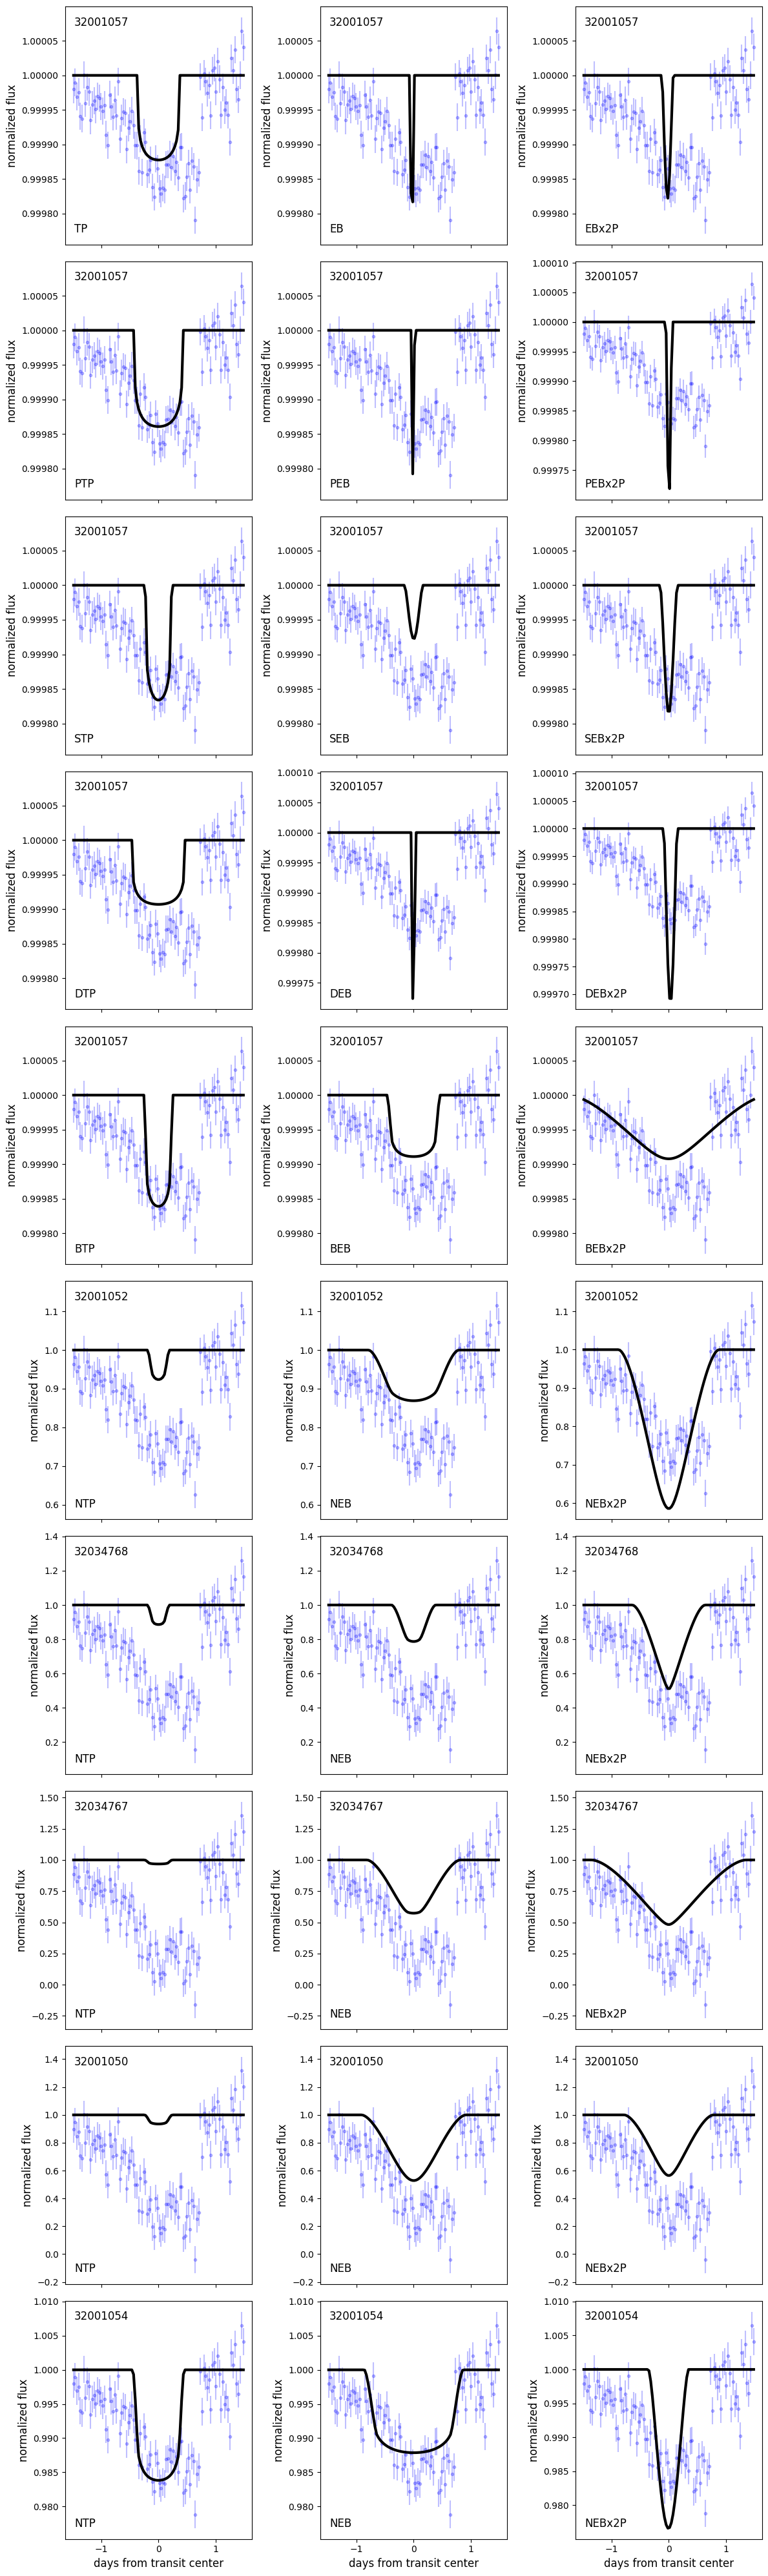

In [11]:
target.plot_fits(time=lc.time.value, flux_0=lc.flux.value, flux_err_0=np.mean(lc.flux_err.value))

In [12]:
%%time

FPPs = np.zeros(20)
NFPPs = np.zeros(20)
for i in range(20):
    target.calc_probs(time=lc.time.value,
                      flux_0=lc.flux.value,
                      flux_err_0=np.mean(lc.flux_err.value),
                      P_orb=P_orb,
                      parallel=True,
                      verbose=0)
    FPPs[i] = target.FPP
    NFPPs[i] = target.NFPP

meanFPP = np.mean(FPPs)
stdvFPP = np.std(FPPs)
print("FPP =", meanFPP, "+/-", stdvFPP)

meanNFPP = np.mean(NFPPs)
stdvNFPP = np.std(NFPPs)
print("NFPP =", meanNFPP, "+/-", stdvNFPP)

FPP = 0.9999016064513879 +/- 0.0004288875350965364
NFPP = 0.8233269780263359 +/- 0.36329537025741326
CPU times: user 15min 51s, sys: 30.9 s, total: 16min 22s
Wall time: 16min 3s


Our final conclusion about this specified planet of TIC 32001057 is that it is a false positive (according to the range of FPP and NFPP set by TRICERATOPS).